## Demo for modelling field-dependent aberration from SMLM data

#### Setup environment

In [ ]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='insitu_FD',channeltype='1ch',sysfile='Ast_Li')

##### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/1ch_FD_smlm_nup96/'
L.param.savename = L.param.datapath + 'psfmodel_2'
L.param.keyword = 'NUP' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.peak_height = 0.2
L.param.roi.roi_size = [21,21]
L.param.batch_size = 1500
L.param.option.model.const_pupilmag = True
L.param.option.insitu.stage_pos = 0.8
L.param.option.insitu.var_stagepos = False
L.param.loss_weight.smooth = 0.03
L.param.iteration = 200
L.param.insitu.min_photon = 0.2
L.param.option.insitu.partition_size = [11,8,8,30] # [z,y,x,number of emitter in each partition]
L.param.option.insitu.repeat = 1
L.param.option.model.n_max = 6
L.param.option.model.division = 40

##### Start learning

In [ ]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

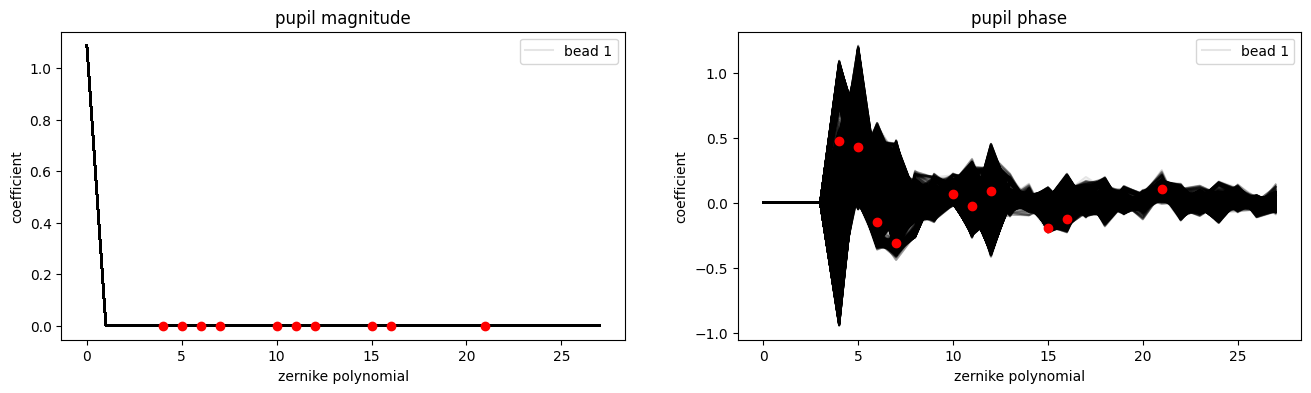

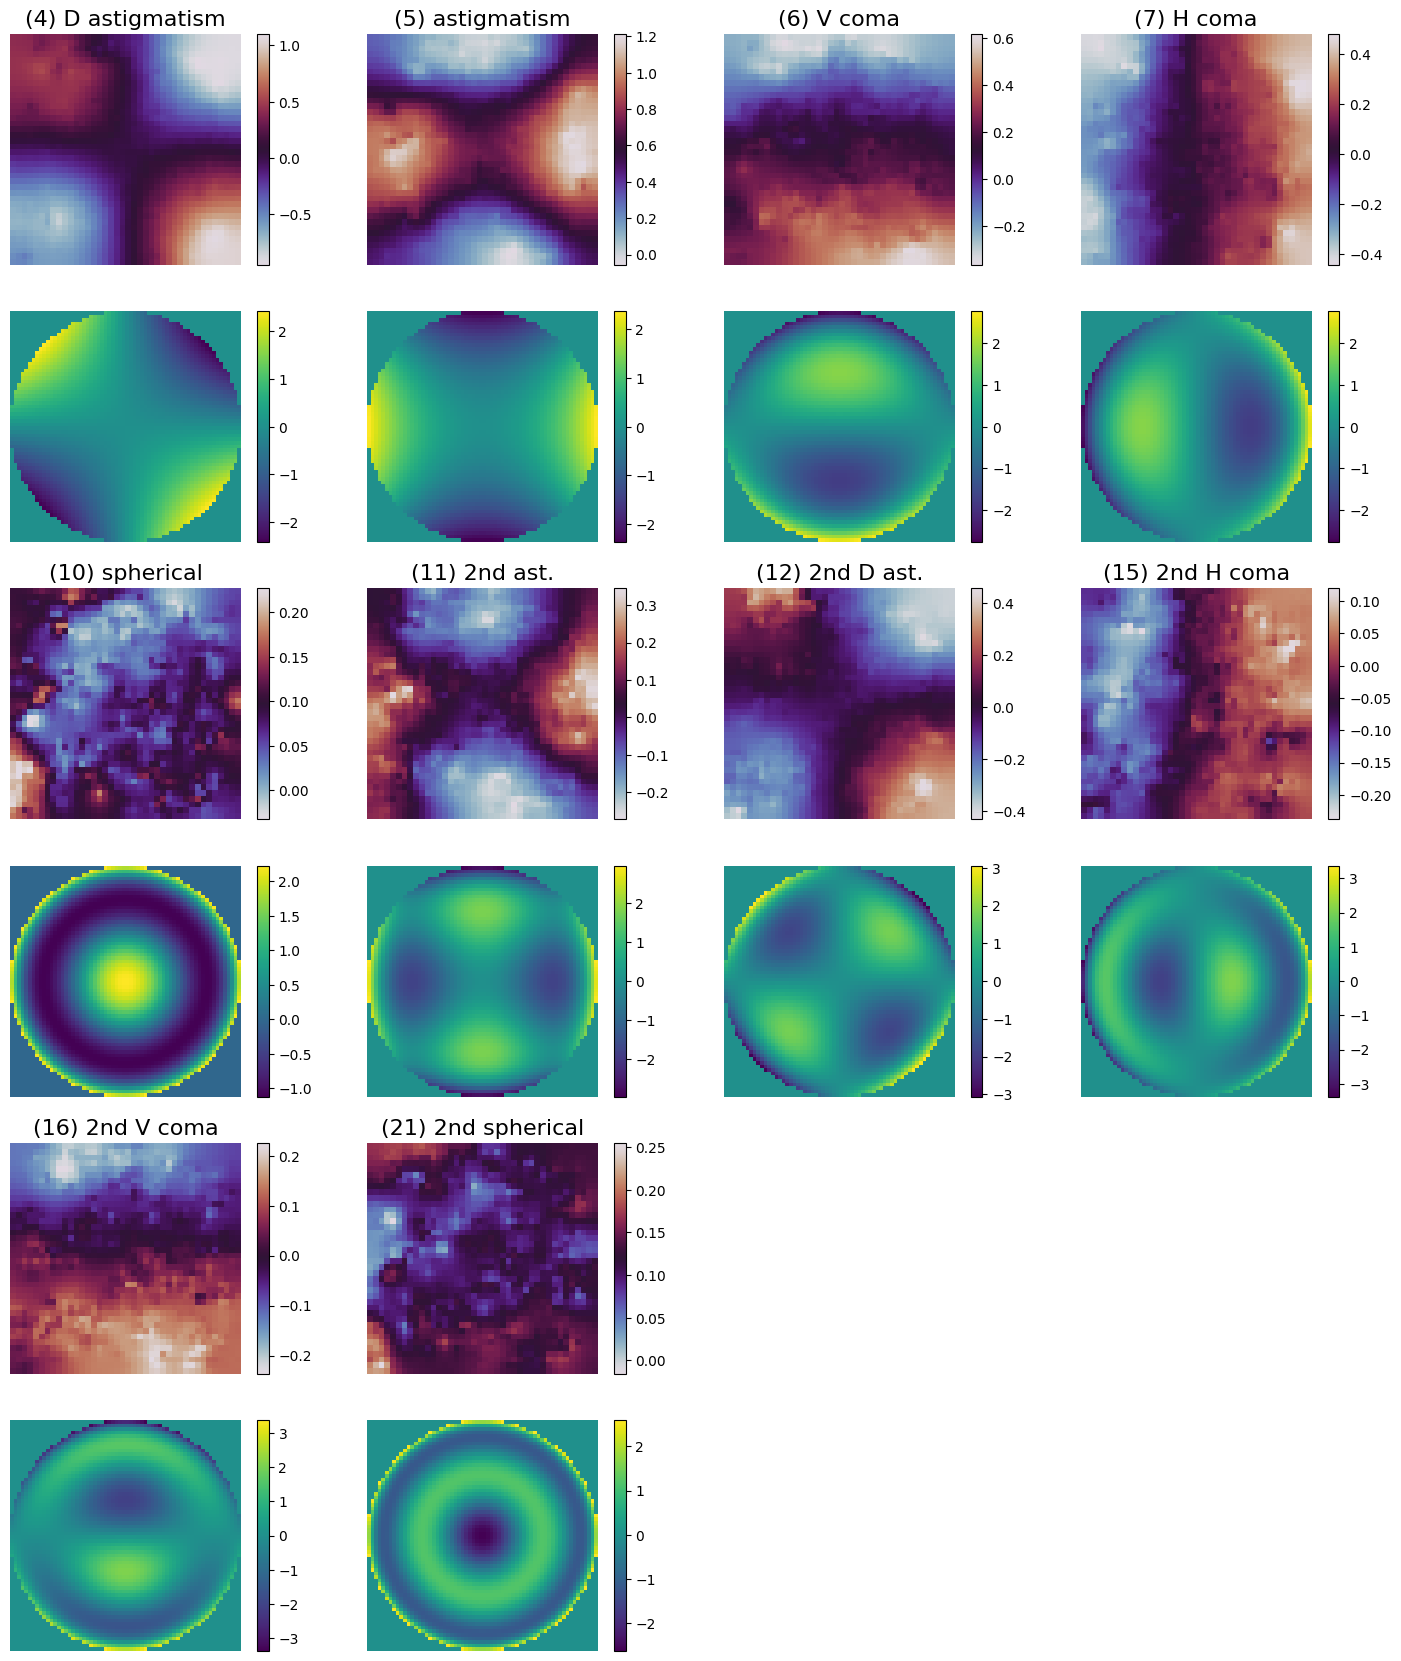

In [6]:
showzernikemap(f,p)

##### Optional plots

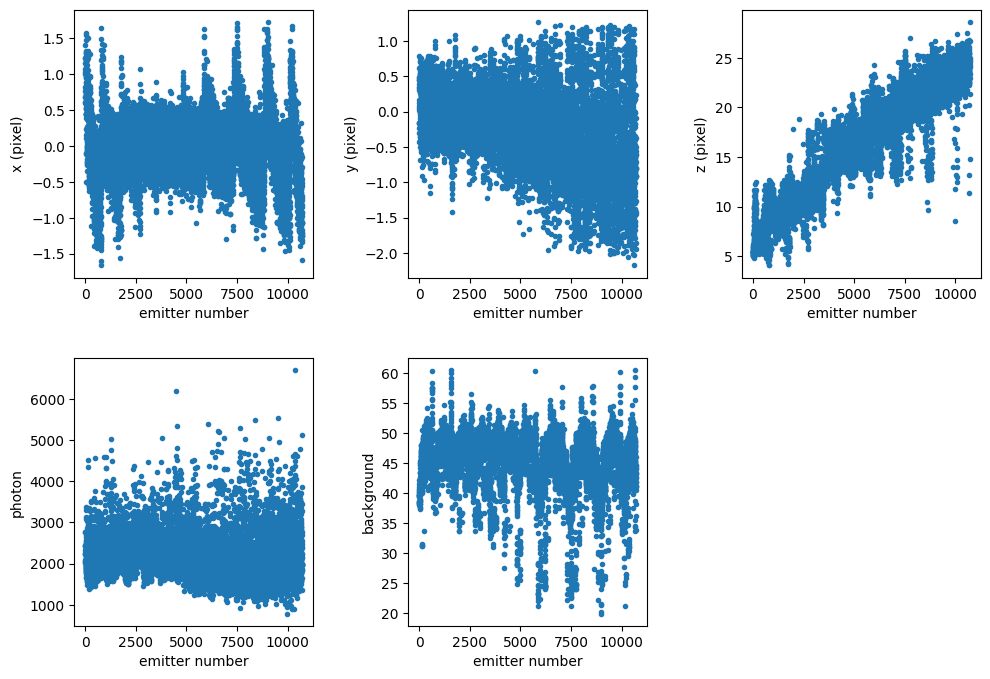

In [7]:
showlearnedparam_insitu(f,p)

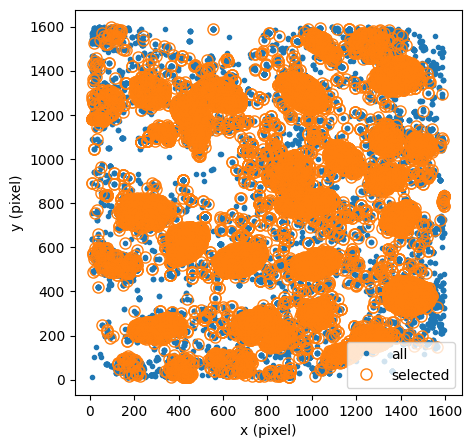

In [8]:
showcoord(f,p)

#### Ouput parameters

In [9]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'apodization', 'bg', 'cor', 'cor_all', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'stagepos', 'zernike_coeff', 'zernike_map', 'zernike_polynomial', 'zoffset']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
